___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [147]:
df = pd.read_csv("cement_slump.csv")

In [148]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [150]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


<AxesSubplot:xlabel='Slag'>

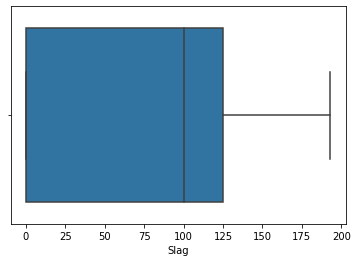

In [151]:
sns.boxplot(df.Slag)

In [152]:
df.corr()["Compressive Strength (28-day)(Mpa)"]

Cement                                0.446
Slag                                 -0.332
Fly ash                               0.444
Water                                -0.254
SP                                   -0.038
Coarse Aggr.                         -0.161
Fine Aggr.                           -0.155
SLUMP(cm)                            -0.223
FLOW(cm)                             -0.124
Compressive Strength (28-day)(Mpa)    1.000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

# EDA and Graphical analysis

<AxesSubplot:>

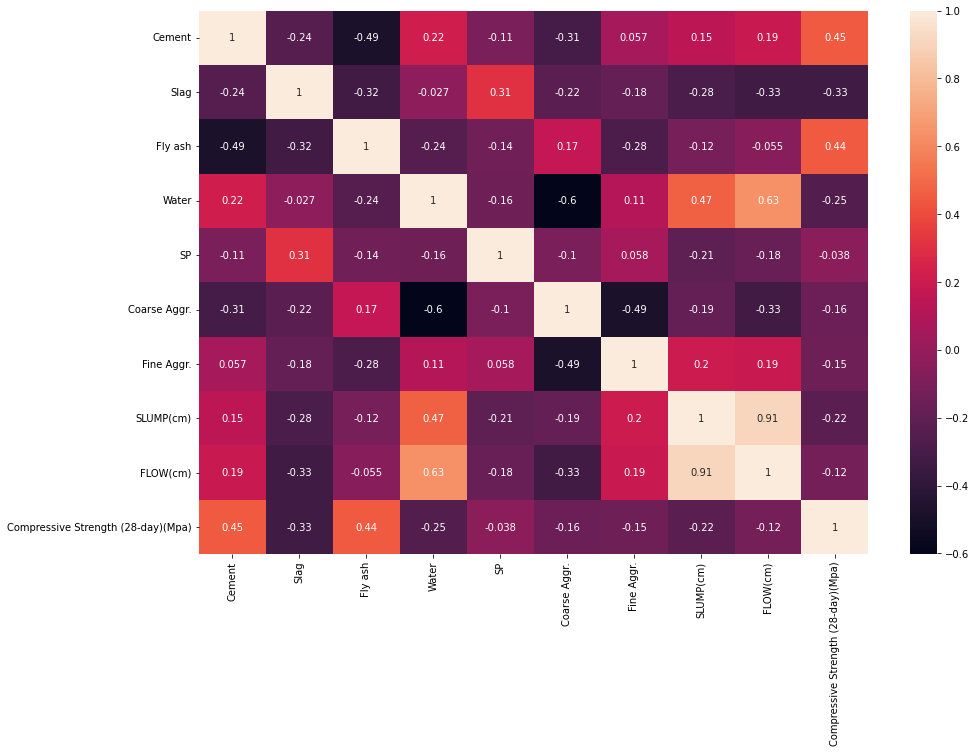

In [153]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

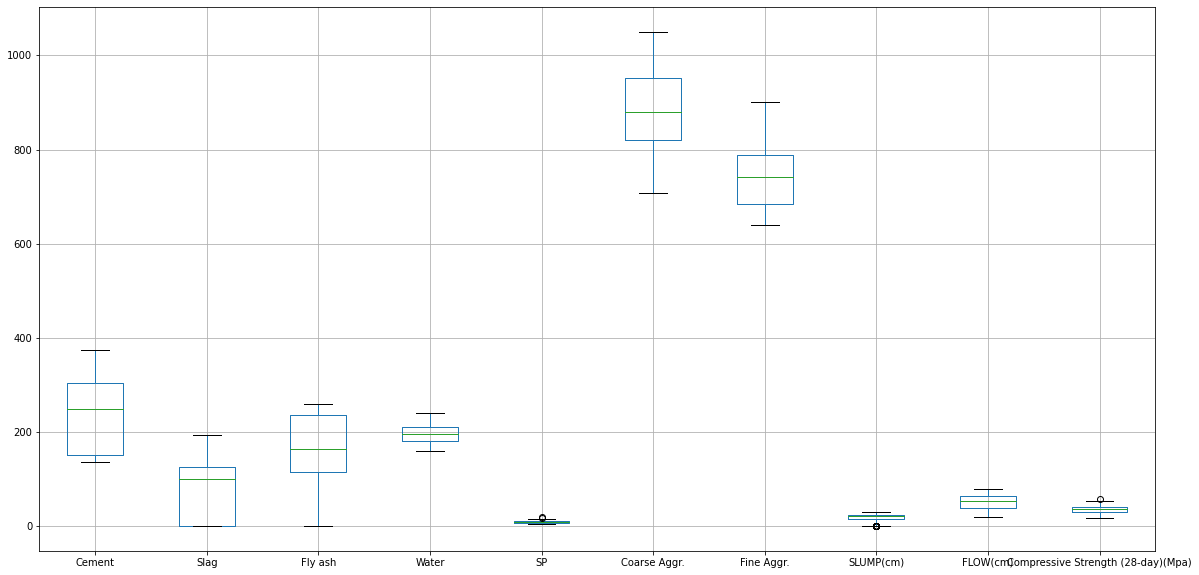

In [154]:
plt.figure(figsize =(20,10))
df.boxplot()

# Data Preprocessing 

### Features and target variable
* Split the data into features and target variable

In [155]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [156]:
X = df.drop(columns='Compressive Strength (28-day)(Mpa)')
y=df['Compressive Strength (28-day)(Mpa)']

### Splitting data into training and testing
* Split the data into training and testing sets

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Scaling
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [160]:
scaler = StandardScaler()

In [161]:
scaler.fit(X_train)

StandardScaler()

In [162]:
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

##  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [163]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [164]:
model.fit(X_train, y_train)

LinearRegression()

In [165]:
y_pred = model.predict(X_test)
y_pred

array([44.8917563 , 41.15689283, 28.63909131, 39.2683702 , 35.28619427,
       39.42748304, 37.35002992, 31.26720085, 28.89114389, 34.43868203,
       44.56568967, 46.82525692, 44.69101832, 32.678262  , 34.05421475,
       27.07506697, 28.6932074 , 38.77017241, 30.70855155, 42.44083235,
       49.23232257, 38.34148766, 21.29680128, 49.09158873, 33.69882648,
       48.95812495])

In [166]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [167]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual,LSE,ABS
30,45.820,44.892,0.928,0.862,0.928
67,40.340,41.157,-0.817,0.667,0.817
62,28.290,28.639,-0.349,0.122,0.349
47,43.010,39.268,3.742,14.000,3.742
42,33.510,35.286,-1.776,3.155,1.776
40,35.660,39.427,-3.767,14.194,3.767
90,35.520,37.350,-1.830,3.349,1.830
45,31.770,31.267,0.503,0.253,0.503
10,26.020,28.891,-2.871,8.243,2.871
0,34.990,34.439,0.551,0.304,0.551


In [168]:
train_pred = model.predict(X_train)
train_pred

array([31.76406793, 40.68043317, 36.301026  , 38.62103508, 32.58001462,
       30.67701549, 46.77271026, 18.57926372, 39.87913237, 36.11112971,
       25.64072404, 28.5724759 , 36.82224404, 41.52306669, 33.70882994,
       35.50974284, 33.19981802, 32.98941779, 28.54596761, 33.98033636,
       39.50860027, 27.63126126, 33.33795734, 31.59704975, 34.99734311,
       46.60493597, 28.80149626, 36.31013446, 40.46813664, 42.77863862,
       36.18604449, 37.53353829, 27.71902897, 38.44634265, 38.44960944,
       34.57628657, 37.19699289, 30.53003856, 43.34098411, 44.07409116,
       45.5628112 , 32.4938003 , 36.52269388, 42.83410128, 39.16825232,
       48.51469966, 28.98694269, 30.25313565, 27.95451374, 52.65941619,
       37.76369817, 31.17666031, 28.38265992, 51.57889361, 40.04553501,
       25.02314999, 26.75800562, 43.38497821, 17.75200503, 43.29236031,
       40.43858561, 39.67199606, 42.48128167, 40.71062733, 17.51411457,
       35.73137613, 43.32389867, 26.74419968, 31.60552486, 33.22

In [169]:
pd.DataFrame({"train_actual" : y_train, "train_pred" : train_pred, "residual": y_train-train_pred}).sample(20)

,train_actual,train_pred,residual
32,52.650,51.579,1.071
29,41.140,43.292,-2.152
48,58.530,52.659,5.871
81,26.280,28.987,-2.707
96,39.130,40.046,-0.916
92,44.480,45.498,-1.018
13,33.910,28.801,5.109
58,26.420,27.955,-1.535
72,29.770,33.980,-4.210
2,41.810,40.711,1.099


In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [171]:
ls = train_val(y_train, train_pred, y_test, y_pred, "LinearRegression")
ls

,LinearRegression_train,LinearRegression_test
R2,0.898,0.929
mae,1.948,1.753
mse,6.017,4.648
rmse,2.453,2.156


### 1.1 Interpret the model
* Interpret the model by looking at the coefficients

In [172]:
model.coef_

array([ 0.05154459, -0.03910481,  0.04098903, -0.23801661, -0.0023271 ,
       -0.06304098, -0.04395018, -0.26520021,  0.08126515])

### 1.2 Model Evaluation
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

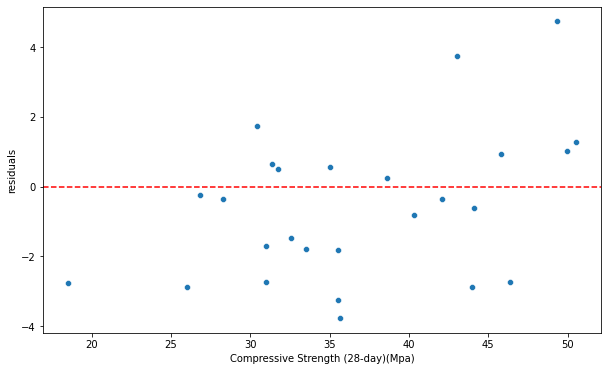

In [173]:
residuals = y_test-y_pred
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) 
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)', ylabel='Density'>

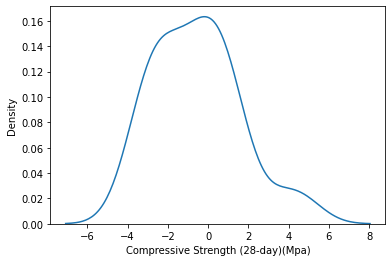

In [174]:
sns.kdeplot(residuals)

# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [175]:
from sklearn.linear_model import Ridge

In [176]:
ridge_model = Ridge(alpha=1)

In [177]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [178]:
y_pred = ridge_model.predict(X_test_scaled)
train_pred = ridge_model.predict(X_train_scaled)

In [179]:
rs = train_val(y_train, train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.897,0.928
mae,1.955,1.755
mse,6.075,4.699
rmse,2.465,2.168


In [181]:
pd.concat([ls, rs], axis=1)

,LinearRegression_train,LinearRegression_test,ridge_train,ridge_test
R2,0.898,0.929,0.897,0.928
mae,1.948,1.753,1.955,1.755
mse,6.017,4.648,6.075,4.699
rmse,2.453,2.156,2.465,2.168


## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [182]:
from sklearn.linear_model import Lasso

In [183]:
lasso_model = Lasso(alpha=1)

In [185]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [186]:
y_pred = lasso_model.predict(X_test_scaled)
train_pred = lasso_model.predict(X_train_scaled)

In [187]:
lss = train_val(y_train, train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.754,0.811
mae,3.013,2.820
mse,14.532,12.344
rmse,3.812,3.513


In [188]:
compare_df = pd.concat([ls, rs, lss], axis=1)
compare_df

,LinearRegression_train,LinearRegression_test,ridge_train,ridge_test,lasso_train,lasso_test
R2,0.898,0.929,0.897,0.928,0.754,0.811
mae,1.948,1.753,1.955,1.755,3.013,2.820
mse,6.017,4.648,6.075,4.699,14.532,12.344
rmse,2.453,2.156,2.465,2.168,3.812,3.513


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [190]:
from sklearn.linear_model import ElasticNet

In [191]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [192]:
y_pred = elastic_model.predict(X_test_scaled)
train_pred = elastic_model.predict(X_train_scaled)

In [193]:
es = train_val(y_train, train_pred, y_test, y_pred, "elastic")
es


,elastic_train,elastic_test
R2,0.610,0.613
mae,3.800,4.175
mse,22.999,25.291
rmse,4.796,5.029


In [198]:
compare_df.join(es)

,LinearRegression_train,LinearRegression_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test
R2,0.898,0.929,0.897,0.928,0.754,0.811,0.610,0.613
mae,1.948,1.753,1.955,1.755,3.013,2.820,3.800,4.175
mse,6.017,4.648,6.075,4.699,14.532,12.344,22.999,25.291
rmse,2.453,2.156,2.465,2.168,3.812,3.513,4.796,5.029


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___